# #3 Entrenamiento y Evaluación del Modelo

Este notebook está enfocado en el entrenamiento de modelos de aprendizaje automático. El proceso de entrenamiento es vital para desarrollar modelos predictivos que puedan generalizar bien a partir de los datos existentes y hacer predicciones precisas sobre datos nuevos.

## Objetivos del Notebook

Los principales objetivos de este notebook son:

- Preparar los datos de entrada para el entrenamiento del modelo, incluyendo la división en conjuntos de entrenamiento y prueba.
- Seleccionar y configurar algoritmos de aprendizaje automático adecuados para el problema en cuestión.
- Entrenar modelos utilizando los datos procesados y ajustar sus hiperparámetros para mejorar su desempeño.
- Evaluar la precisión y el rendimiento de los modelos mediante métricas adecuadas.
- Guardar los modelos entrenados para su uso posterior en la realización de predicciones.

## Contenido del Notebook

El contenido de este notebook se divide en las siguientes secciones:

1. **Preparación de los Datos:** Dividiremos los datos en conjuntos de entrenamiento y prueba, los cuales serán utilizados durante el entrenamiento y evaluación del modelo.

2. **Selección de Modelos:** Compararemos los diferentes algoritmos de aprendizaje automático y elegiremos los 3 mejores para la creación del modelo.

3. **Entrenamiento y Ajuste de Hiperparámetros:** Realizaremos el proceso de entrenamiento sobre los 3 modelos escogidos y ajustaremos sus hiperparámetros utilizando técnicas como la validación cruzada.

4. **Evaluación de los Modelos:** Evaluaremos el desempeño de los modelos y discutiremos los resultados obtenidos.

5. **Exportación de los Modelos:** Finalmente, guardaremos los modelos entrenados para que puedan ser utilizados más adelante sin necesidad ser reentrenados.

Cada sección estará acompañada de código y explicaciones detalladas para guiar al usuario a través de cada paso del proceso de entrenamiento del modelo.

## Autores
- **Miguel Guerrero Ruiz**
- **Bastián Sepúlveda Silva**

## Librerías utilizadas

En este notebook se realiza la importación de varias librerías necesarias para manejar los datos, seleccionar y entrenar los modelos de aprendizaje automático, evaluar su desempeño y persistir los modelos entrenados para su uso futuro. A continuación, se detallan todas las librerías utilizadas:

- `pycaret`: Una biblioteca de aprendizaje automático que automatiza el flujo de trabajo de un proyecto típico de ciencia de datos y ayuda a desplegar los modelos de manera rápida y sencilla.
- `pandas` (alias `pd`): Una herramienta fundamental para la manipulación de datos en Python, que proporciona estructuras de datos de alto rendimiento y fácil de usar.
- `numpy` (alias `np`): La biblioteca fundamental para la computación científica en Python, que proporciona soporte para arrays y matrices multidimensionales, junto con una amplia colección de funciones matemáticas.
- `sklearn.model_selection.train_test_split`: Función de scikit-learn para dividir los conjuntos de datos en dos bloques, uno para entrenamiento y otro para pruebas, de manera que se puedan evaluar los modelos.
- `sklearn.metrics`: Contiene funciones de evaluación de modelos, como `mean_squared_error` para calcular el error cuadrático medio y `r2_score` para la puntuación del coeficiente de determinación (R²).
- `category_encoders` (alias `ce`): Un conjunto de transformadores de scikit-learn para codificar variables categóricas en formatos numéricos adecuados para modelos de machine learning.
- `pycaret.regression`: Módulo de PyCaret para tareas de regresión que facilita la comparación de múltiples modelos y la selección del mejor de ellos.
- `sklearn.model_selection.RandomizedSearchCV`: Una técnica para ajustar hiperparámetros que busca entre un rango de valores y selecciona la mejor combinación de manera aleatoria y eficiente.
- `catboost.CatBoostRegressor`: Implementación del algoritmo de Gradient Boosting de Yandex, optimizado para manejar datos categóricos de forma eficiente.
- `xgboost.XGBRegressor`: Una biblioteca optimizada de Gradient Boosting diseñada para ser altamente eficiente, flexible y portátil.
- `lightgbm.LGBMRegressor`: Un framework de Gradient Boosting rápido, distribuido y de alto rendimiento basado en algoritmos de árboles de decisión.
- `pickle`: Un módulo de Python para serializar y deserializar objetos de Python, permitiendo guardar modelos entrenados en disco y cargarlos posteriormente.




## Instalacion de paquetes necesarios

In [ ]:
# Se instala pycaret[full] ya que es utilizado para comparar los modelos y trabajar en base a los resultados obtenidos.
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 12.1 MB

In [ ]:
# Se importan las librerias a utilizar
import pycaret
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import category_encoders as ce
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pickle
import matplotlib.pyplot as plt

from google.colab import drive
#drive.mount('/content/drive/') # descomentar para cargar datos desde Google Drive

Mounted at /content/drive/


## Lectura de datos

In [ ]:
file_path = './dataset_pronostico_estadia.parquet'
df = pd.read_parquet(file_path)

## 1. Preparacion de los Datos

En esta sección, dividiremos los datos en conjuntos de entrenamiento y prueba, los cuales serán utilizados durante el entrenamiento y evaluación del modelo.

In [ ]:
# Se separan los datos en conjuntos de entrenamiento y prueba
X = df.drop(columns=['Log_Estancia']) # Se omite la variable objetivo
y = df['Log_Estancia'] # Solo se consider la variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Selección de Modelos

En esta sección, compararemos los diferentes algoritmos de aprendizaje automático y elegiremos los 3 mejores para la creación del modelo. Para ello, se realizarán los siguientes pasos:

- Se creará una instancia de pycaret para realizar pruebas con los modelos.
- Se compararán los resultados de los modelos y se escogerán los 3 mejores para utilizarlos en el futuro.

### Instanciación de pycaret

In [ ]:
from pycaret.regression import *

reg = setup(data = df, target='Log_Estancia', session_id=123)

,Description,Value
0,Session id,123
1,Target,Log_Estancia
2,Target type,Regression
3,Original data shape,"(129179, 36)"
4,Transformed data shape,"(129179, 36)"
5,Transformed train set shape,"(90425, 36)"
6,Transformed test set shape,"(38754, 36)"
7,Numeric features,35
8,Preprocess,True
9,Imputation type,simple


### Comparación y selección de modelos

In [ ]:
best = compare_models(turbo=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.4047,0.3055,0.5526,0.6944,0.2663,1.0929,25.0990
xgboost,Extreme Gradient Boosting,0.4137,0.3190,0.5648,0.6809,0.2704,1.1183,1.4290
lightgbm,Light Gradient Boosting Machine,0.4170,0.3225,0.5679,0.6773,0.2729,1.1112,5.6990
rf,Random Forest Regressor,0.4163,0.3316,0.5758,0.6683,0.2731,1.1010,108.9290
et,Extra Trees Regressor,0.4236,0.3381,0.5814,0.6618,0.2769,1.1078,59.6510
gbr,Gradient Boosting Regressor,0.4428,0.3576,0.5980,0.6422,0.2826,1.1665,23.8410
mlp,MLP Regressor,0.4459,0.3641,0.6034,0.6358,0.2834,1.2061,42.9130
svm,Support Vector Regression,0.4544,0.3793,0.6159,0.6206,0.2901,1.1885,1037.3060
ridge,Ridge Regression,0.4912,0.4325,0.6576,0.5673,0.3008,1.2819,0.1290
lar,Least Angle Regression,0.4912,0.4325,0.6576,0.5673,0.3008,1.2819,0.1350


Processing:   0%|          | 0/109 [00:00<?, ?it/s]

**Observaciones:** A partir de las pruebas realizadas con `pycaret`, se escogieron los 3 modelos con los mejores resultados, en este caso: `CatBoost Regressor (catboost)`, `Extreme Gradient Boosting (xgboost)` y `Light Gradient Boosting Machine (lightgbm)`

## 3. Entrenamiento y Ajuste de Hiperparámetros

En esta sección, realizaremos el proceso de entrenamiento sobre los 3 modelos escogidos y ajustaremos sus hiperparámetros utilizando técnicas como la validación cruzada. Para ello, se realizarán los siguientes pasos:

- Se realizará una búsqueda recursiva de los hiperparámetros de cada modelo.
- Se mostrarán los resultados obtenidos luego de la obtención de hiperparámetros.
- Se guardarán los hiperparámetros obtenidos
- Se entrenarán los modelos con sus respectivos hiperparámetros.

### Búsqueda recursiva de hiperparámetros

Si bien la ejecución de cada una de estas celdas solo conserva aquella que arrojo los hiperparámetros con los mejores resultados, el proceso de búsqueda de hiperparámetros se realizó en múltiples ocasiones para cada modelo.

In [ ]:
# Se define el espacio de búsqueda para CatBoost
catboost_space = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

catboost_model = CatBoostRegressor(verbose=0)
catboost_search = RandomizedSearchCV(catboost_model, catboost_space, n_iter=50, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)
catboost_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000002048144A280>,
                   n_iter=50, n_jobs=-1,
                   param_distributions={'depth': [4, 6, 8, 10],
                                        'iterations': [500, 1000, 1500],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1,
                                                          0.5]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Se define el espacio de búsqueda para XGBoost
xgboost_space = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5, 6, 7],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

xgboost_model = xgb.XGBRegressor()
xgboost_search = RandomizedSearchCV(xgboost_model, xgboost_space, n_iter=50, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)
xgboost_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.8, 0.9, 1]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Se define el espacio de búsqueda para LightGBM
lgbm_space = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_depth': [3, 4, 5, 6, 7],
    'num_leaves': [31, 60, 90],
    'min_data_in_leaf': [20, 30, 40],
    'verbose': [-1] # eliminar advertencias de LightGBM
}

lgbm_model = lgb.LGBMRegressor()
lgbm_search = RandomizedSearchCV(lgbm_model, lgbm_space, n_iter=50, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)
lgbm_search.fit(X_train, y_train)

In [ ]:
# Se realizan las predicciones de los modelos
catboost_preds = catboost_search.best_estimator_.predict(X_test)
xgboost_preds = xgboost_search.best_estimator_.predict(X_test)
lgbm_preds = lgbm_search.best_estimator_.predict(X_test)

# Se evalúan las predicciones
catboost_mse = mean_squared_error(y_test, catboost_preds)
xgboost_mse = mean_squared_error(y_test, xgboost_preds)
lgbm_mse = mean_squared_error(y_test, lgbm_preds)

catboost_r2 = r2_score(y_test, catboost_preds)
xgboost_r2 = r2_score(y_test, xgboost_preds)
lgbm_r2 = r2_score(y_test, lgbm_preds)

# Se muestran los resultados (MSE y R2)
print(f"CatBoost MSE: {catboost_mse}, R2: {catboost_r2}")
print(f"XGBoost MSE: {xgboost_mse}, R2: {xgboost_r2}")
print(f"LightGBM MSE: {lgbm_mse}, R2: {lgbm_r2}")

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
CatBoost MSE: 0.29590831428888503, R2: 0.7051262937657276
XGBoost MSE: 0.2930274706726114, R2: 0.7079970648566088
LightGBM MSE: 0.29410672237802765, R2: 0.7069215866257907


**Observaciones:** El resultado de MSE se encuentra fuera del rango esperado debido a la transformación logarítmica aplicada a la variable objetivo, sin embargo, el valor de R2 no se ve afectado por esto. En los siguientes pasos, se utilizarán los valores originales de la variable objetivo para realizar la evaluación de los modelos.

In [ ]:
# Se extraen los mejores hiperparámetros para cada modelo
best_params_catboost = catboost_search.best_params_
best_params_xgboost = xgboost_search.best_params_
best_params_lgbm = lgbm_search.best_params_

# Se combinan los hiperparámetros en un único diccionario para facilitar su uso
all_best_params = {
    "CatBoost": best_params_catboost,
    "XGBoost": best_params_xgboost,
    "LightGBM": best_params_lgbm
}

print(all_best_params)

{'CatBoost': {'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 1500, 'depth': 6}, 'XGBoost': {'subsample': 0.8, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1}, 'LightGBM': {'num_leaves': 60, 'n_estimators': 1000, 'min_data_in_leaf': 40, 'max_depth': 7, 'learning_rate': 0.05}}


In [ ]:
# Se entrenan los modelos con sus respectivos hiperparámetros
# Hiperparámetros para cada modelo
best_params_catboost = {'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 1500, 'depth': 6}
best_params_xgboost = {'subsample': 0.8, 'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1}
best_params_lgbm = {'num_leaves': 60, 'n_estimators': 1000, 'min_data_in_leaf': 40, 'max_depth': 7, 'learning_rate': 0.05}

# Se instancia y entrena CatBoost
model_catboost = CatBoostRegressor(**best_params_catboost)
model_catboost.fit(X_train, y_train, verbose=False)  # Establecer verbose en False para reducir la salida durante el entrenamiento

# Se instancia y entrena XGBoost
model_xgboost = XGBRegressor(**best_params_xgboost)
model_xgboost.fit(X_train, y_train, verbose=False)

# Se instancia y entrena LightGBM
model_lgbm = LGBMRegressor(**best_params_lgbm)
model_lgbm.fit(X_train, y_train, verbose=False)

## 4. Evaluación de los Modelos

En esta sección, evaluaremos el desempeño de los modelos y discutiremos los resultados obtenidos. Para ello, se realizarán los siguientes pasos:

- Se revertirá la transformación logarítmica aplicada a la variable objetivo durante el preprocesamiento de los datos (ver notebook #2).
- Se crearán gráficos para observar la diferencia entre los resultados esperados y los obtenidos.

In [ ]:
# Se revierte la transformación logarítmica de la variable objetivo
y_test_reverted = np.expm1(y_test)
catboost_preds_reverted = np.expm1(catboost_preds)
xgboost_preds_reverted = np.expm1(xgboost_preds)
lgbm_preds_reverted = np.expm1(lgbm_preds)

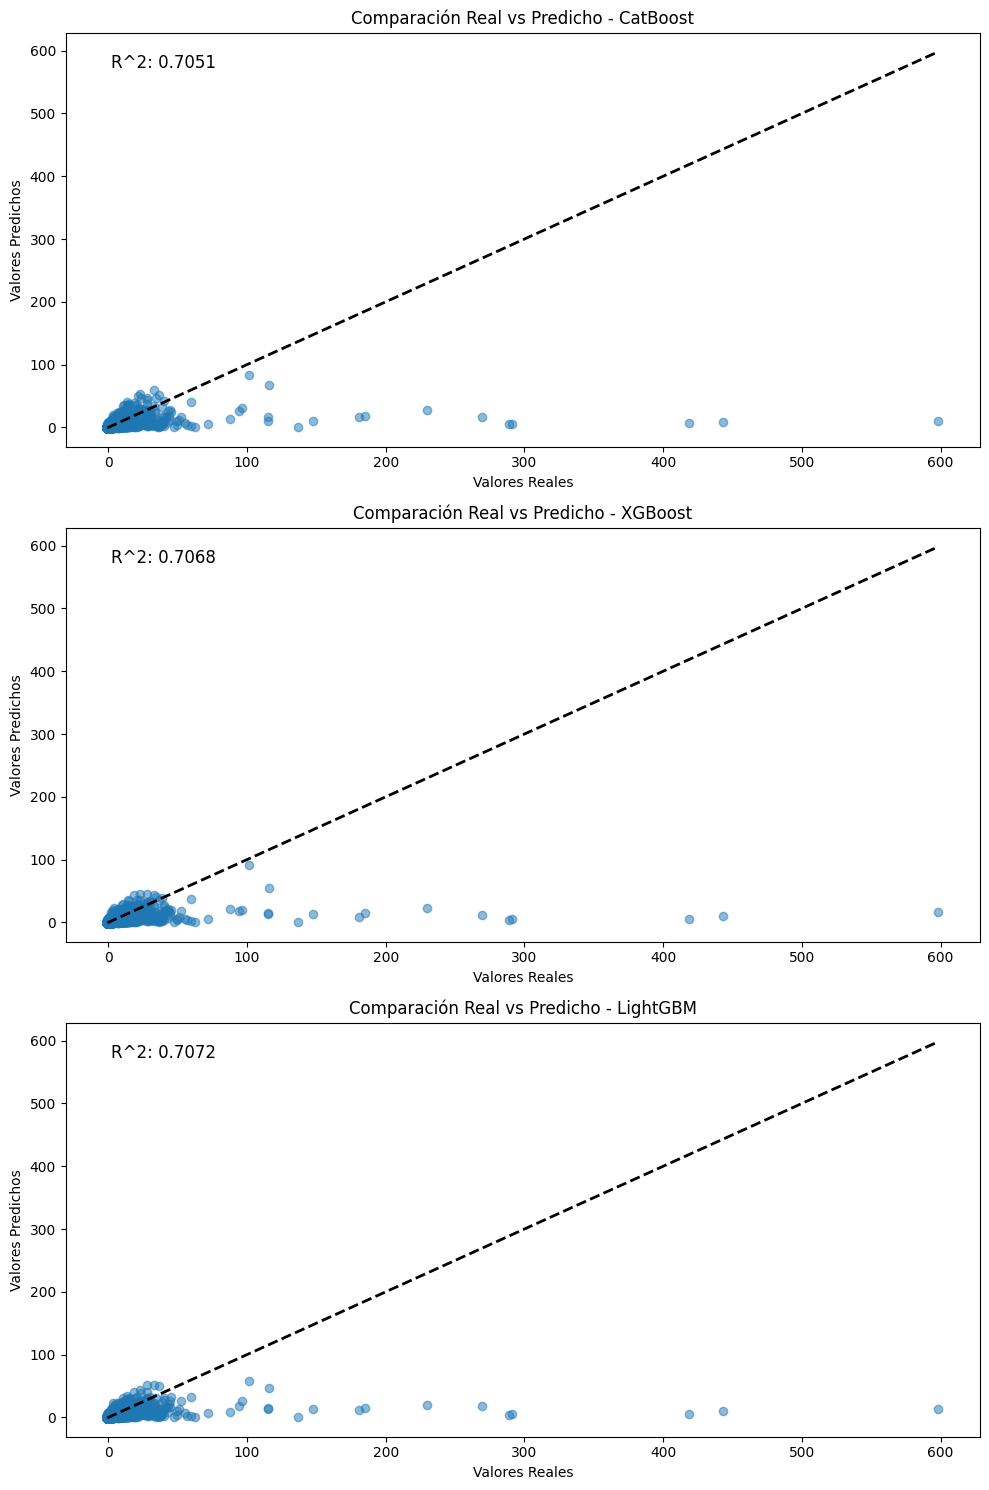

In [ ]:
# Se crea un gráfico de dispersión para cada modelo
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico para CatBoost
ax[0].scatter(y_test_reverted, catboost_preds_reverted, alpha=0.5)
ax[0].plot([y_test_reverted.min(), y_test_reverted.max()], [y_test_reverted.min(), y_test_reverted.max()], 'k--', lw=2)
ax[0].set_title('Comparación Real vs Predicho - CatBoost')
ax[0].set_xlabel('Valores Reales')
ax[0].set_ylabel('Valores Predichos')
ax[0].text(0.05, 0.95, f'R^2: {catboost_r2:.4f}', transform=ax[0].transAxes, fontsize=12, verticalalignment='top')

# Gráfico para XGBoost
ax[1].scatter(y_test_reverted, xgboost_preds_reverted, alpha=0.5)
ax[1].plot([y_test_reverted.min(), y_test_reverted.max()], [y_test_reverted.min(), y_test_reverted.max()], 'k--', lw=2)
ax[1].set_title('Comparación Real vs Predicho - XGBoost')
ax[1].set_xlabel('Valores Reales')
ax[1].set_ylabel('Valores Predichos')
ax[1].text(0.05, 0.95, f'R^2: {xgboost_r2:.4f}', transform=ax[1].transAxes, fontsize=12, verticalalignment='top')

# Gráfico para LightGBM
ax[2].scatter(y_test_reverted, lgbm_preds_reverted, alpha=0.5)
ax[2].plot([y_test_reverted.min(), y_test_reverted.max()], [y_test_reverted.min(), y_test_reverted.max()], 'k--', lw=2)
ax[2].set_title('Comparación Real vs Predicho - LightGBM')
ax[2].set_xlabel('Valores Reales')
ax[2].set_ylabel('Valores Predichos')
ax[2].text(0.05, 0.95, f'R^2: {lgbm_r2:.4f}', transform=ax[2].transAxes, fontsize=12, verticalalignment='top')

# Se muestran los gráficos
plt.tight_layout()
plt.show()

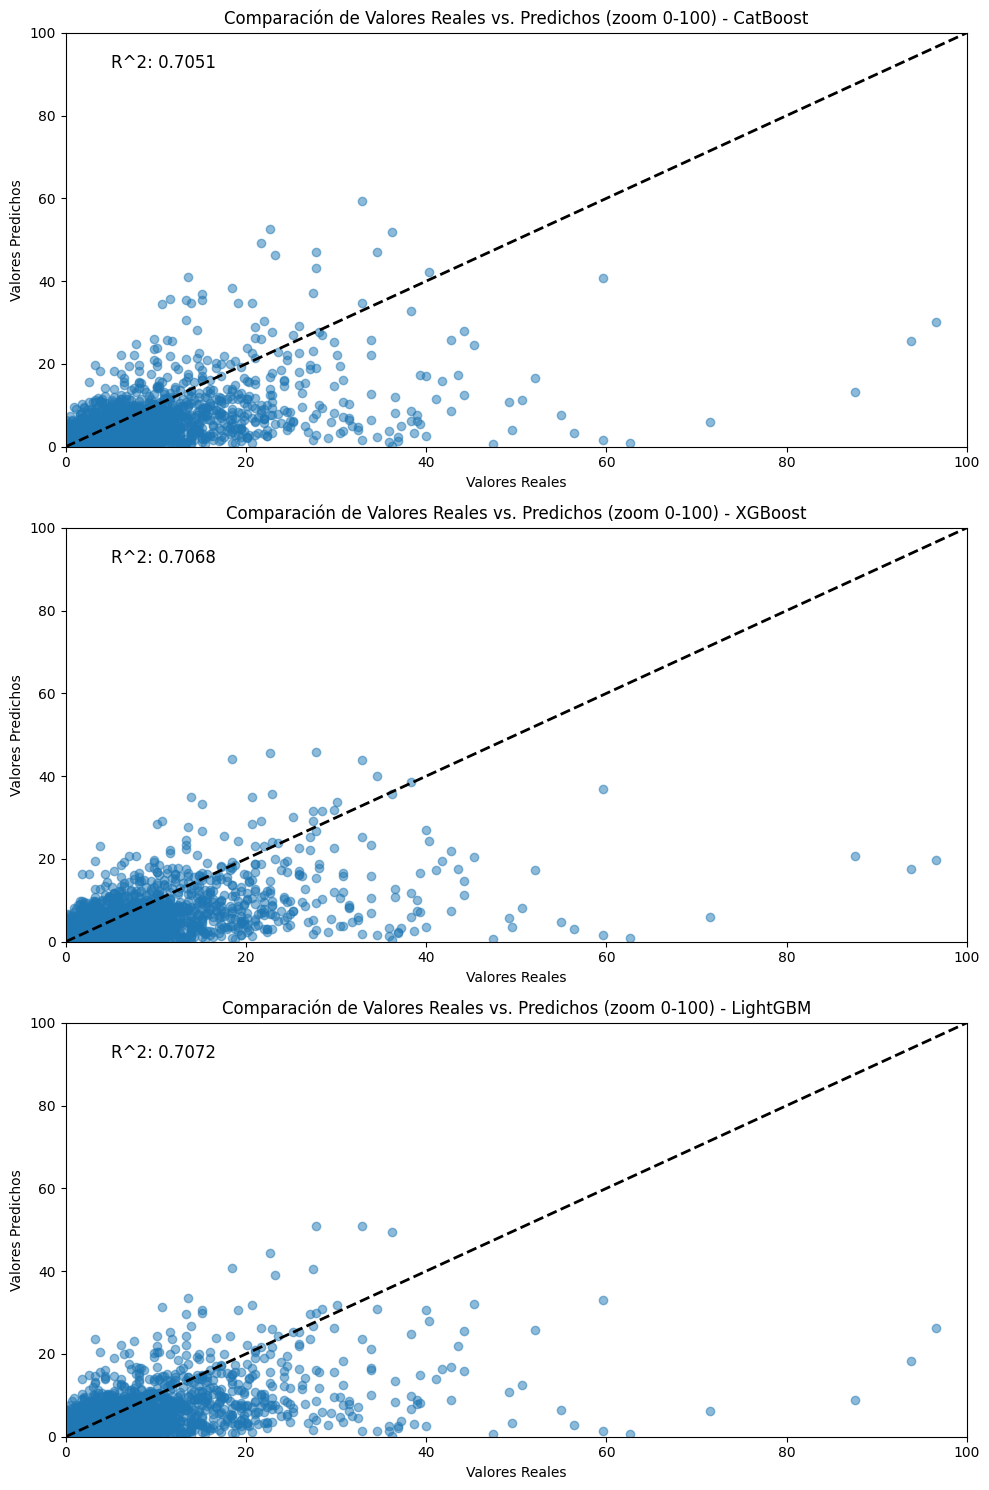

In [ ]:
# Se crea un gráfico de dispersión para cada modelo (con zoom en el rango entre 0 y 100)
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico para CatBoost
ax[0].scatter(y_test_reverted, catboost_preds_reverted, alpha=0.5)
ax[0].plot([0, 100], [0, 100], 'k--', lw=2)
ax[0].set_xlim(0, 100)
ax[0].set_ylim(0, 100)
ax[0].set_xlabel('Valores Reales')
ax[0].set_ylabel('Valores Predichos')
ax[0].set_title('Comparación de Valores Reales vs. Predichos (zoom 0-100) - CatBoost')
ax[0].text(0.05, 0.95, f'R^2: {catboost_r2:.4f}', transform=ax[0].transAxes, fontsize=12, verticalalignment='top')

# Gráfico para XGBoost
ax[1].scatter(y_test_reverted, xgboost_preds_reverted, alpha=0.5)
ax[1].plot([0, 100], [0, 100], 'k--', lw=2)
ax[1].set_xlim(0, 100)
ax[1].set_ylim(0, 100)
ax[1].set_xlabel('Valores Reales')
ax[1].set_ylabel('Valores Predichos')
ax[1].set_title('Comparación de Valores Reales vs. Predichos (zoom 0-100) - XGBoost')
ax[1].text(0.05, 0.95, f'R^2: {xgboost_r2:.4f}', transform=ax[1].transAxes, fontsize=12, verticalalignment='top')

# Gráfico para LightGBM
ax[2].scatter(y_test_reverted, lgbm_preds_reverted, alpha=0.5)
ax[2].plot([0, 100], [0, 100], 'k--', lw=2)
ax[2].set_xlim(0, 100)
ax[2].set_ylim(0, 100)
ax[2].set_xlabel('Valores Reales')
ax[2].set_ylabel('Valores Predichos')
ax[2].set_title('Comparación de Valores Reales vs. Predichos (zoom 0-100) - LightGBM')
ax[2].text(0.05, 0.95, f'R^2: {lgbm_r2:.4f}', transform=ax[2].transAxes, fontsize=12, verticalalignment='top')

# Se muestran los gráficos
plt.tight_layout()
plt.show()

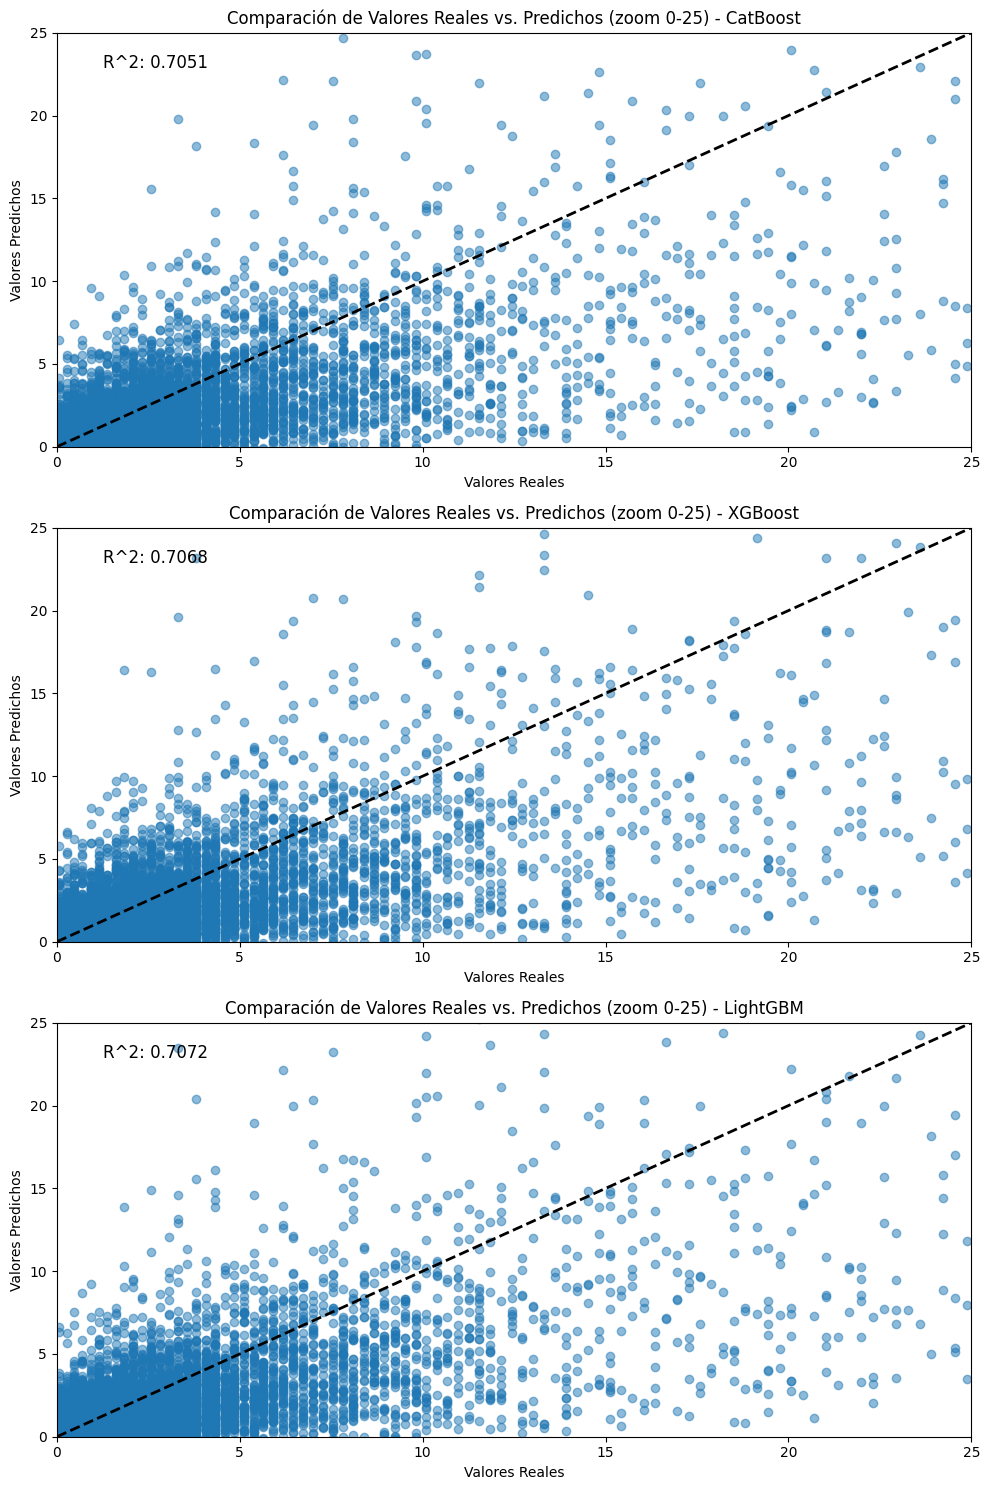

In [ ]:
# Se crea un gráfico de dispersión para cada modelo (con zoom en el rango entre 0 y 25)
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico para CatBoost
ax[0].scatter(y_test_reverted, catboost_preds_reverted, alpha=0.5)
ax[0].plot([0, 25], [0, 25], 'k--', lw=2)
ax[0].set_xlim(0, 25)
ax[0].set_ylim(0, 25)
ax[0].set_xlabel('Valores Reales')
ax[0].set_ylabel('Valores Predichos')
ax[0].set_title('Comparación de Valores Reales vs. Predichos (zoom 0-25) - CatBoost')
ax[0].text(0.05, 0.95, f'R^2: {catboost_r2:.4f}', transform=ax[0].transAxes, fontsize=12, verticalalignment='top')

# Gráfico para XGBoost
ax[1].scatter(y_test_reverted, xgboost_preds_reverted, alpha=0.5)
ax[1].plot([0, 25], [0, 25], 'k--', lw=2)
ax[1].set_xlim(0, 25)
ax[1].set_ylim(0, 25)
ax[1].set_xlabel('Valores Reales')
ax[1].set_ylabel('Valores Predichos')
ax[1].set_title('Comparación de Valores Reales vs. Predichos (zoom 0-25) - XGBoost')
ax[1].text(0.05, 0.95, f'R^2: {xgboost_r2:.4f}', transform=ax[1].transAxes, fontsize=12, verticalalignment='top')

# Gráfico para LightGBM
ax[2].scatter(y_test_reverted, lgbm_preds_reverted, alpha=0.5)
ax[2].plot([0, 25], [0, 25], 'k--', lw=2)
ax[2].set_xlim(0, 25)
ax[2].set_ylim(0, 25)
ax[2].set_xlabel('Valores Reales')
ax[2].set_ylabel('Valores Predichos')
ax[2].set_title('Comparación de Valores Reales vs. Predichos (zoom 0-25) - LightGBM')
ax[2].text(0.05, 0.95, f'R^2: {lgbm_r2:.4f}', transform=ax[2].transAxes, fontsize=12, verticalalignment='top')

# Se muestran los gráficos
plt.tight_layout()
plt.show()

**Observaciones:** Se logró apreciar que la mayor cantidad de valores se encontraban concentrados entre 0 y 20, por lo que se realizó un aumento en esa área para apreciar con mayor detalle la diferencia entre los valores reales y los predichos. En los valores reales más bajos, las discrepancias entre estos y los valores predichos eran inferiores a las que se presentaban a medida que los valores reales aumentaban. Dado que la mayoría de valores altos correspondían a *outliers*, es decir, aparecían con poca frecuencia en el dataframe, la dispersión en los valores bajos tiene más valor para este caso de estudio en concreto.

## 5. Exportación de los Modelos

En esta sección, guardaremos los modelos entrenados para que puedan ser utilizados más adelante sin necesidad de ser reentrenados. Para esto, se utilizará la librería `pickle`.

In [ ]:
# Se define la ruta para guardar el archivo
file_path = './'

# Se guarda el modelo entrenado de CatBoost
with open(file_path + 'catboost_model.pkl', 'wb') as file:
    pickle.dump(model_catboost, file)

# Se guarda el modelo entrenado de XGBoost
with open(file_path + 'xgboost_model.pkl', 'wb') as file:
    pickle.dump(model_xgboost, file)

# Se guarda el modelo entrenado de LightGBM
with open(file_path + 'lgbm_model.pkl', 'wb') as file:
    pickle.dump(model_lgbm, file)

## 6. Código Auxiliar para la Carga de los Modelos Entrenados

A través del código contenido en esta sección, los modelos guardados pueden ser cargados para utilizarlos directamente.

In [ ]:
# Se define la ruta base donde están guardados los modelos
file_path = './'

# Se carga el modelo entrenado de CatBoost
with open(file_path + 'catboost_model.pkl', 'rb') as file:
    catboost_search = pickle.load(file)

# Se carga el modelo entrenado de XGBoost
with open(file_path + 'xgboost_model.pkl', 'rb') as file:
    xgboost_search = pickle.load(file)

# Se carga el modelo entrenado de LightGBM
with open(file_path + 'lgbm_model.pkl', 'rb') as file:
    lgbm_search = pickle.load(file)

# Se confirma que se han cargado correctamente los modelos
print("Modelos cargados correctamente.")